# EDA for NASA Turbo Fan Jet Engine Dataset
Using NASA's Turbofan Jet Engine dataset to predict RUL (Remaining useful life) for predicive maintainance

Dataset link: [NASA's Prognostics Data Repository](https://www.nasa.gov/intelligent-systems-division/discovery-and-systems-health/pcoe/pcoe-data-set-repository/) 

Listed as Dataset #6

## 1. Import and load in raw data

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [64]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")

plt.rcParams.update({
    # Backgrounds
    "figure.facecolor": "#111111",
    "axes.facecolor":   "#111111",

    # Grid
    "axes.grid": True,
    "grid.color": "#444444",
    "grid.linewidth": 0.6,
    "grid.alpha": 0.4,

    # Axes & Ticks
    "axes.edgecolor": "#888888",
    "axes.labelcolor": "#e8e8e8",
    "xtick.color": "#cccccc",
    "ytick.color": "#cccccc",

    # Neon-ish color cycle
    "axes.prop_cycle": plt.cycler(color=[
        "#00eaff",  # neon cyan
        "#ff3bff",  # neon magenta
        "#aaff00",  # neon lime
        "#ffaa00",  # neon orange
        "#00ff9d",  # neon mint
        "#9d00ff"   # neon purple
    ]),

    # Lines
    "lines.linewidth": 2.0,

    # Fonts
    "font.size": 12
})


In [65]:
print(os.getcwd())
path = r'C:\Users\User\Documents\school\Data Analysis projects\nasa-cmaps-pipeline\data/train_FD001.txt'

C:\Users\User\Documents\school\Data Analysis projects\nasa-cmaps-pipeline\notebooks


In [66]:
# Load in dataset and label columns
col_names = (
    ["unit_number", "time_in_cycles"] + 
    [f"operational_setting_{i}" for i in range(1,4)] +
    [f"sensor_{i}" for i in range(1, 22)]
)

df = pd.read_csv(path, sep=r"\s+", header=None, names=col_names)

In [67]:
df

unit_number  time_in_cycles  operational_setting_1  \
0                1               1                -0.0007   
1                1               2                 0.0019   
2                1               3                -0.0043   
3                1               4                 0.0007   
4                1               5                -0.0019   
...            ...             ...                    ...   
20626          100             196                -0.0004   
20627          100             197                -0.0016   
20628          100             198                 0.0004   
20629          100             199                -0.0011   
20630          100             200                -0.0032   

       operational_setting_2  operational_setting_3  sensor_1  sensor_2  \
0                    -0.0004                  100.0    518.67    641.82   
1                    -0.0003                  100.0    518.67    642.15   
2                     0.0003                  100.0    518.67    642.35   
3                     0.0000                  100.0    518.67    642.35   
4                    -0.0002                  100.0    518.67    642.37   
...                      ...                    ...       ...       ...   
20626                -0.0003                  100.0    518.67    643.49   
20627                -0.0005                  100.0    518.67    643.54   
20628                 0.0000                  100.0    518.67    643.42   
20629                 0.0003                  100.0    518.67    643.23   
20630                -0.0005                  100.0    518.67    643.85   

       sensor_3  sensor_4  sensor_5  ...  sensor_12  sensor_13  sensor_14  \
0       1589.70   1400.60     14.62  ...     521.66    2388.02    8138.62   
1       1591.82   1403.14     14.62  ...     522.28    2388.07    8131.49   
2       1587.99   1404.20     14.62  ...     522.42    2388.03    8133.23   
3       1582.79   1401.87     14.62  ...     522.86    2388.08    8133.83   
4       1582.85   1406.22     14.62  ...     522.19    2388.04    8133.80   
...         ...       ...       ...  ...        ...        ...        ...   
20626   1597.98   1428.63     14.62  ...     519.49    2388.26    8137.60   
20627   1604.50   1433.58     14.62  ...     519.68    2388.22    8136.50   
20628   1602.46   1428.18     14.62  ...     520.01    2388.24    8141.05   
20629   1605.26   1426.53     14.62  ...     519.67    2388.23    8139.29   
20630   1600.38   1432.14     14.62  ...     519.30    2388.26    8137.33   

       sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  \
0         8.4195       0.03        392       2388      100.0      39.06   
1         8.4318       0.03        392       2388      100.0      39.00   
2         8.4178       0.03        390       2388      100.0      38.95   
3         8.3682       0.03        392       2388      100.0      38.88   
4         8.4294       0.03        393       2388      100.0      38.90   
...          ...        ...        ...        ...        ...        ...   
20626     8.4956       0.03        397       2388      100.0      38.49   
20627     8.5139       0.03        395       2388      100.0      38.30   
20628     8.5646       0.03        398       2388      100.0      38.44   
20629     8.5389       0.03        395       2388      100.0      38.29   
20630     8.5036       0.03        396       2388      100.0      38.37   

       sensor_21  
0        23.4190  
1        23.4236  
2        23.3442  
3        23.3739  
4        23.4044  
...          ...  
20626    22.9735  
20627    23.1594  
20628    22.9333  
20629    23.0640  
20630    23.0522  

[20631 rows x 26 columns]

## 2. Creating RUL and Exploring Target Variable Distributions

In [68]:
# Get max cycle for each engine
rul_lookup = df.groupby("unit_number")["time_in_cycles"].max().reset_index()
rul_lookup.columns = ["unit_number", "max_cycle"]
rul_lookup

unit_number  max_cycle
0             1        192
1             2        287
2             3        179
3             4        189
4             5        269
..          ...        ...
95           96        336
96           97        202
97           98        156
98           99        185
99          100        200

[100 rows x 2 columns]

In [69]:
# Merge max_cycle for each unit back into the dataframe to calculate RUL
df = df.merge(rul_lookup, on="unit_number")
df['RUL'] = df["max_cycle"] - df["time_in_cycles"]

In [70]:
# Square root rule to decide number of bins
num_bins = int(np.sqrt(20631))

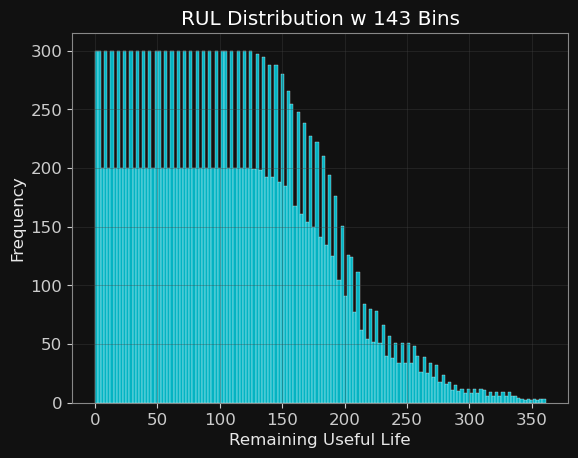

In [71]:
# Plot RUL distribution with square root rule
sns.histplot(data=df, x="RUL", bins=num_bins)
plt.title("RUL Distribution w 143 Bins")
plt.xlabel("Remaining Useful Life")
plt.ylabel("Frequency")
plt.show()

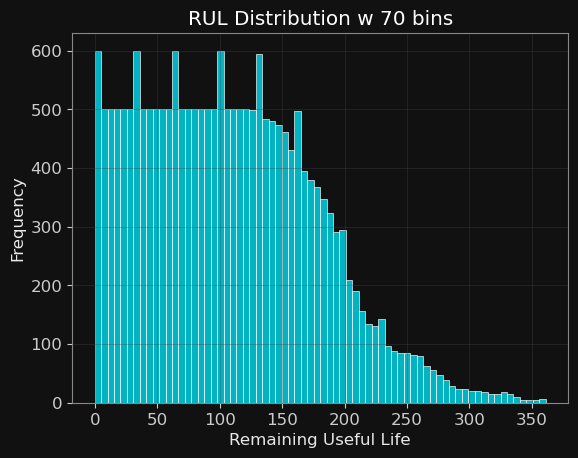

In [72]:
# Plot RUL distribution with lower number of bins
sns.histplot(data=df, x="RUL", bins=70)
plt.title("RUL Distribution w 70 bins")
plt.xlabel("Remaining Useful Life")
plt.ylabel("Frequency")
plt.show()

In [73]:
# Get list of column names
df_columns = df.columns

## 3. Data Summary

In [74]:
# Check for nulls in data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            20631 non-null  int64  
 1   time_in_cycles         20631 non-null  int64  
 2   operational_setting_1  20631 non-null  float64
 3   operational_setting_2  20631 non-null  float64
 4   operational_setting_3  20631 non-null  float64
 5   sensor_1               20631 non-null  float64
 6   sensor_2               20631 non-null  float64
 7   sensor_3               20631 non-null  float64
 8   sensor_4               20631 non-null  float64
 9   sensor_5               20631 non-null  float64
 10  sensor_6               20631 non-null  float64
 11  sensor_7               20631 non-null  float64
 12  sensor_8               20631 non-null  float64
 13  sensor_9               20631 non-null  float64
 14  sensor_10              20631 non-null  float64
 15  se

In [75]:
# Check shape of the datset
df.shape

(20631, 28)

In [76]:
# Generate simple statistics for each feature
with pd.option_context('display.max_columns', None):
    display(df.describe())

unit_number  time_in_cycles  operational_setting_1  \
count  20631.000000    20631.000000           20631.000000   
mean      51.506568      108.807862              -0.000009   
std       29.227633       68.880990               0.002187   
min        1.000000        1.000000              -0.008700   
25%       26.000000       52.000000              -0.001500   
50%       52.000000      104.000000               0.000000   
75%       77.000000      156.000000               0.001500   
max      100.000000      362.000000               0.008700   

       operational_setting_2  operational_setting_3      sensor_1  \
count           20631.000000                20631.0  2.063100e+04   
mean                0.000002                  100.0  5.186700e+02   
std                 0.000293                    0.0  6.537152e-11   
min                -0.000600                  100.0  5.186700e+02   
25%                -0.000200                  100.0  5.186700e+02   
50%                 0.000000                  100.0  5.186700e+02   
75%                 0.000300                  100.0  5.186700e+02   
max                 0.000600                  100.0  5.186700e+02   

           sensor_2      sensor_3      sensor_4      sensor_5      sensor_6  \
count  20631.000000  20631.000000  20631.000000  2.063100e+04  20631.000000   
mean     642.680934   1590.523119   1408.933782  1.462000e+01     21.609803   
std        0.500053      6.131150      9.000605  3.394700e-12      0.001389   
min      641.210000   1571.040000   1382.250000  1.462000e+01     21.600000   
25%      642.325000   1586.260000   1402.360000  1.462000e+01     21.610000   
50%      642.640000   1590.100000   1408.040000  1.462000e+01     21.610000   
75%      643.000000   1594.380000   1414.555000  1.462000e+01     21.610000   
max      644.530000   1616.910000   1441.490000  1.462000e+01     21.610000   

           sensor_7      sensor_8      sensor_9     sensor_10     sensor_11  \
count  20631.000000  20631.000000  20631.000000  2.063100e+04  20631.000000   
mean     553.367711   2388.096652   9065.242941  1.300000e+00     47.541168   
std        0.885092      0.070985     22.082880  4.660829e-13      0.267087   
min      549.850000   2387.900000   9021.730000  1.300000e+00     46.850000   
25%      552.810000   2388.050000   9053.100000  1.300000e+00     47.350000   
50%      553.440000   2388.090000   9060.660000  1.300000e+00     47.510000   
75%      554.010000   2388.140000   9069.420000  1.300000e+00     47.700000   
max      556.060000   2388.560000   9244.590000  1.300000e+00     48.530000   

          sensor_12     sensor_13     sensor_14     sensor_15     sensor_16  \
count  20631.000000  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean     521.413470   2388.096152   8143.752722      8.442146  3.000000e-02   
std        0.737553      0.071919     19.076176      0.037505  1.556432e-14   
min      518.690000   2387.880000   8099.940000      8.324900  3.000000e-02   
25%      520.960000   2388.040000   8133.245000      8.414900  3.000000e-02   
50%      521.480000   2388.090000   8140.540000      8.438900  3.000000e-02   
75%      521.950000   2388.140000   8148.310000      8.465600  3.000000e-02   
max      523.380000   2388.560000   8293.720000      8.584800  3.000000e-02   

          sensor_17  sensor_18  sensor_19     sensor_20     sensor_21  \
count  20631.000000    20631.0    20631.0  20631.000000  20631.000000   
mean     393.210654     2388.0      100.0     38.816271     23.289705   
std        1.548763        0.0        0.0      0.180746      0.108251   
min      388.000000     2388.0      100.0     38.140000     22.894200   
25%      392.000000     2388.0      100.0     38.700000     23.221800   
50%      393.000000     2388.0      100.0     38.830000     23.297900   
75%      394.000000     2388.0      100.0     38.950000     23.366800   
max      400.000000     2388.0      100.0     39.430000     23.618400   

          max_cycle           RUL

In [77]:
# Check amount of unique values in each feature and append those with 1 or less to dropping list
unique_numbers_1_todrop = []

for x, y in df.nunique().sort_values().items():
    if y <= 1:
        unique_numbers_1_todrop.append(x)
        
unique_numbers_1_todrop

['sensor_18',
 'sensor_10',
 'operational_setting_3',
 'sensor_1',
 'sensor_19',
 'sensor_16',
 'sensor_5']

In [78]:
# Sanity check for non variance
for x in unique_numbers_1_todrop:
    print(df[x].value_counts())
    print(f'Number of unique values in {x}:', len(df[x].value_counts()))
    print('=' * 40)

sensor_18
2388    20631
Name: count, dtype: int64
Number of unique values in sensor_18: 1
sensor_10
1.3    20631
Name: count, dtype: int64
Number of unique values in sensor_10: 1
operational_setting_3
100.0    20631
Name: count, dtype: int64
Number of unique values in operational_setting_3: 1
sensor_1
518.67    20631
Name: count, dtype: int64
Number of unique values in sensor_1: 1
sensor_19
100.0    20631
Name: count, dtype: int64
Number of unique values in sensor_19: 1
sensor_16
0.03    20631
Name: count, dtype: int64
Number of unique values in sensor_16: 1
sensor_5
14.62    20631
Name: count, dtype: int64
Number of unique values in sensor_5: 1


In [79]:
# Drop features with only one unique value
df = df.drop(columns=unique_numbers_1_todrop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            20631 non-null  int64  
 1   time_in_cycles         20631 non-null  int64  
 2   operational_setting_1  20631 non-null  float64
 3   operational_setting_2  20631 non-null  float64
 4   sensor_2               20631 non-null  float64
 5   sensor_3               20631 non-null  float64
 6   sensor_4               20631 non-null  float64
 7   sensor_6               20631 non-null  float64
 8   sensor_7               20631 non-null  float64
 9   sensor_8               20631 non-null  float64
 10  sensor_9               20631 non-null  float64
 11  sensor_11              20631 non-null  float64
 12  sensor_12              20631 non-null  float64
 13  sensor_13              20631 non-null  float64
 14  sensor_14              20631 non-null  float64
 15  se

In [80]:
# Sanity check for dropped features
df.nunique().sort_values()

sensor_6                    2
operational_setting_2      13
sensor_17                  13
sensor_8                   53
sensor_13                  56
max_cycle                  66
unit_number               100
sensor_20                 120
operational_setting_1     158
sensor_11                 159
sensor_2                  310
RUL                       362
time_in_cycles            362
sensor_12                 427
sensor_7                  513
sensor_15                1918
sensor_3                 3012
sensor_4                 4051
sensor_21                4745
sensor_14                6078
sensor_9                 6403
dtype: int64

## 4. Exploring Trends in Target Variable and Feature Distributions

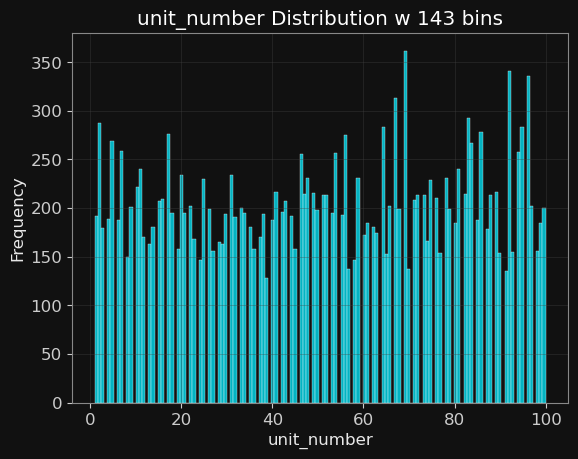

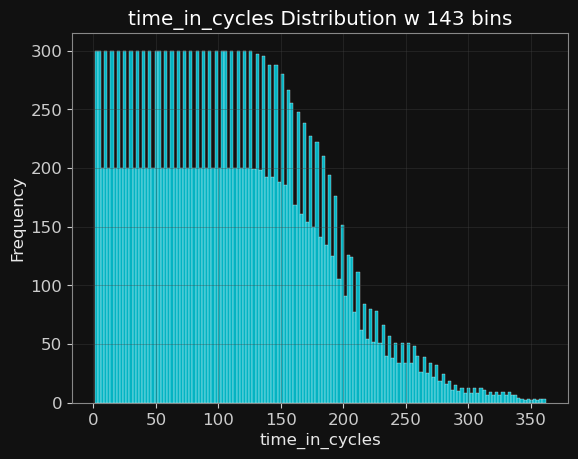

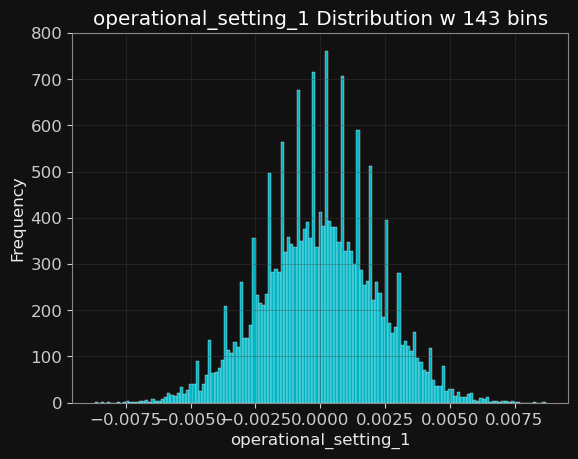

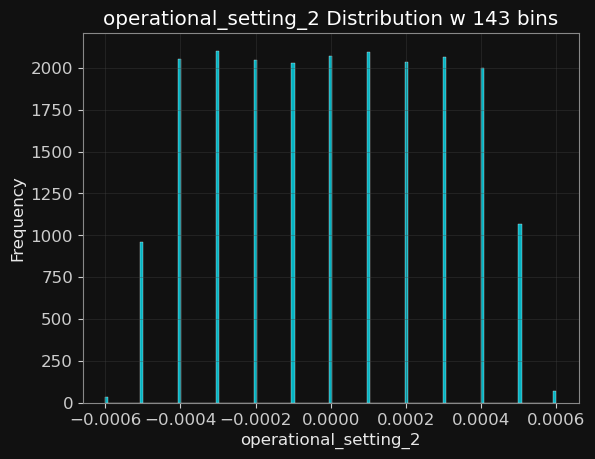

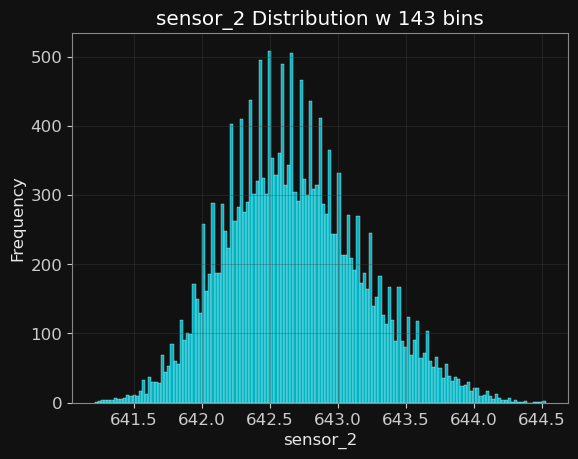

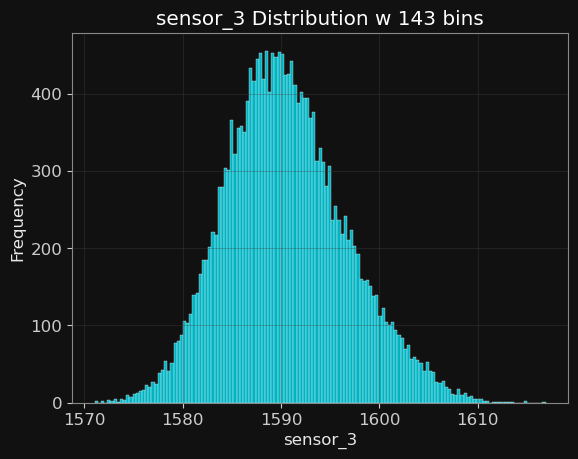

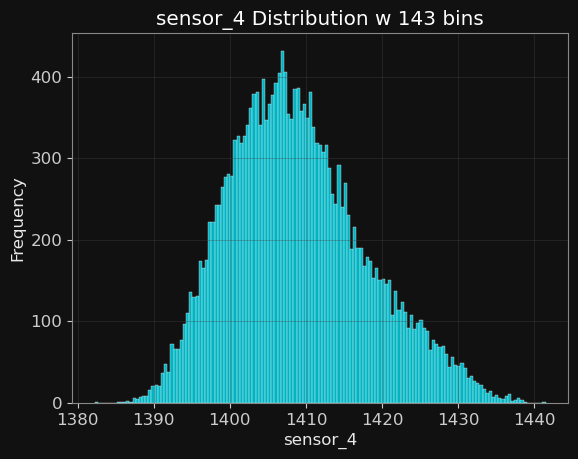

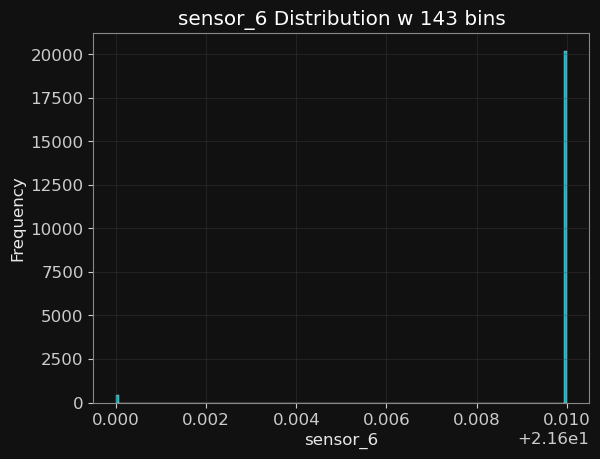

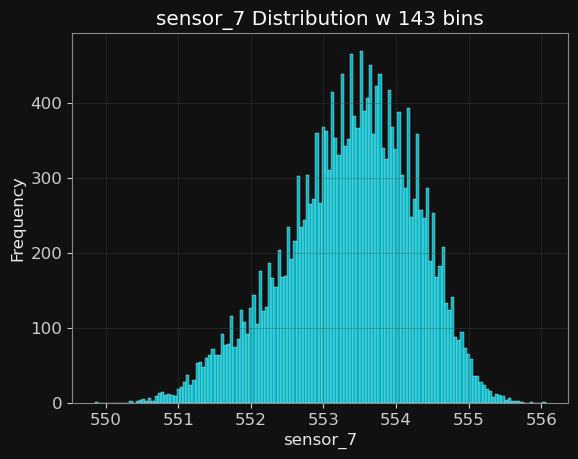

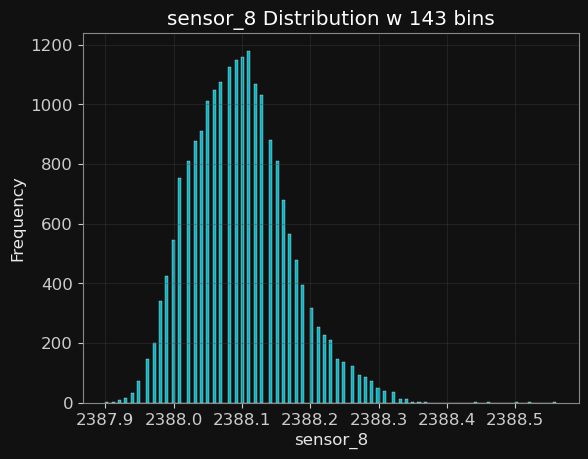

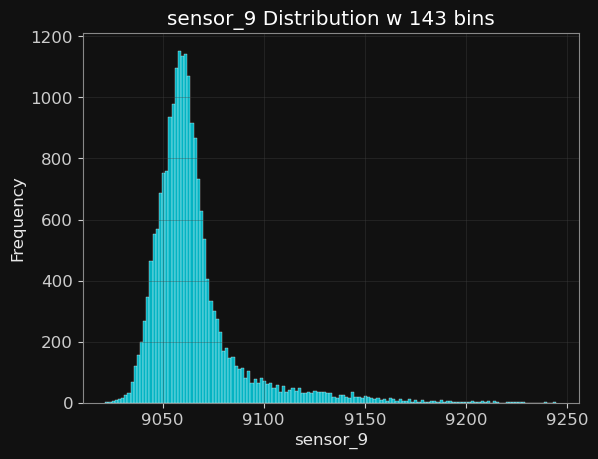

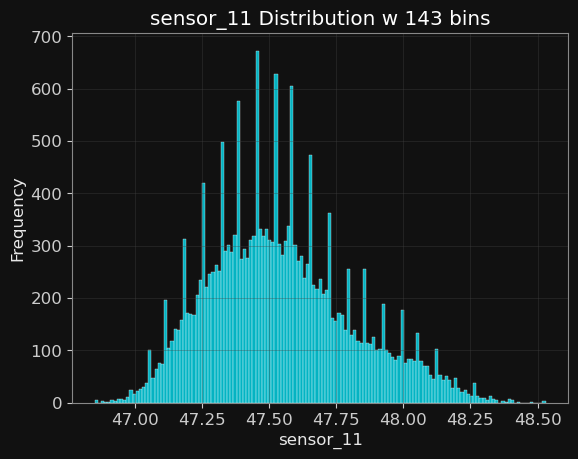

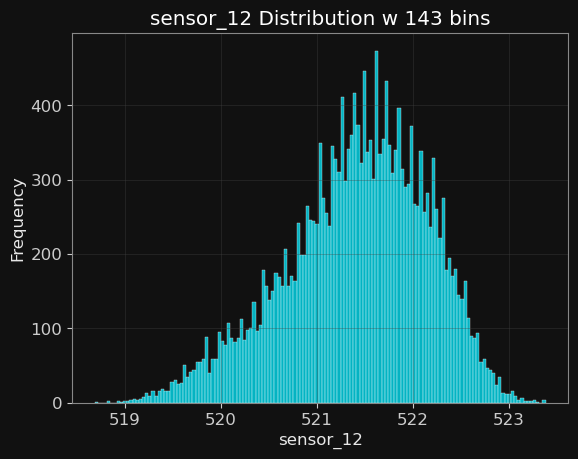

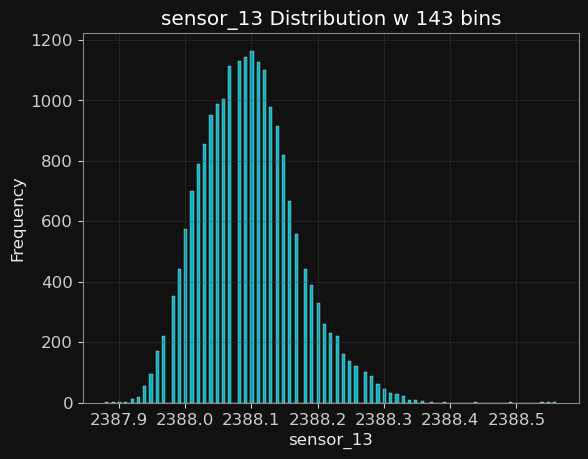

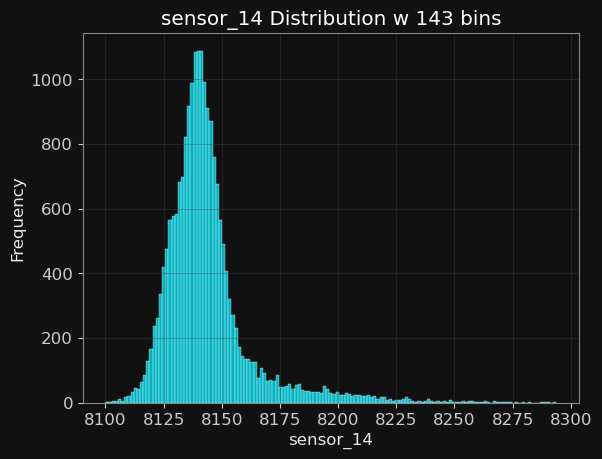

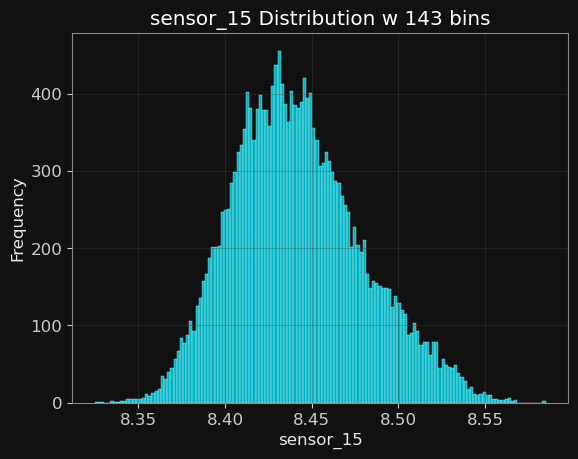

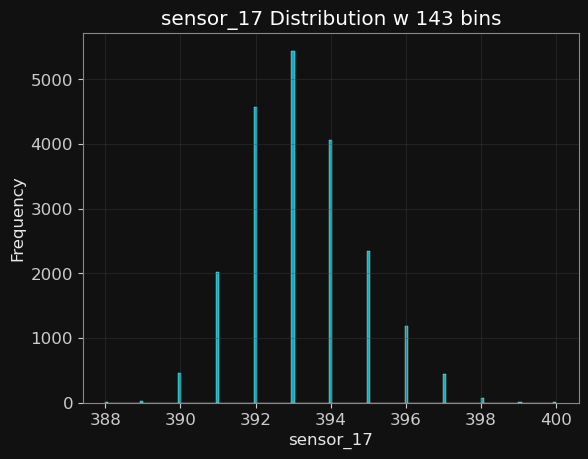

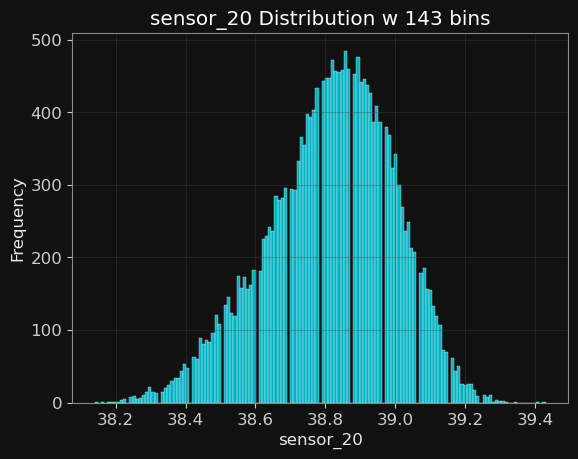

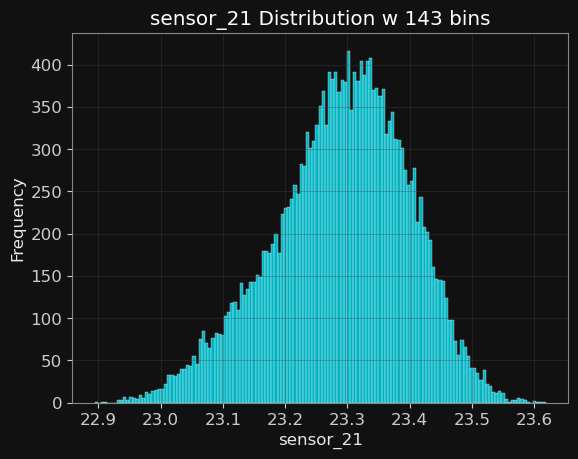

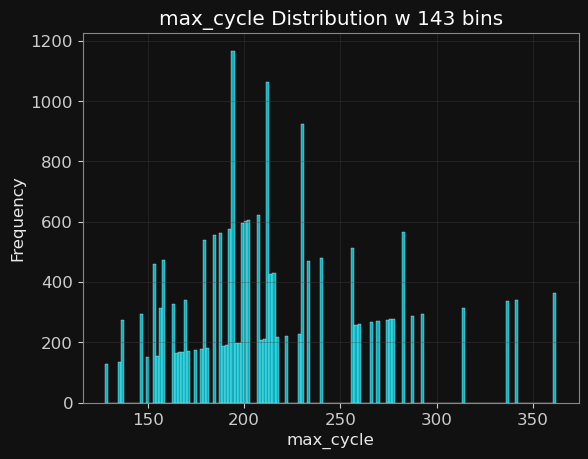

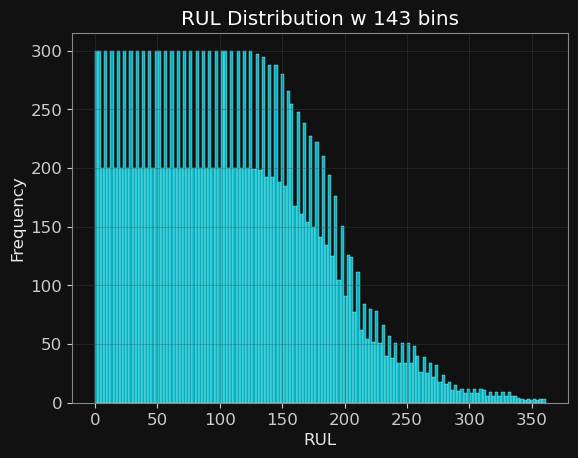

In [81]:
# Recheck distributions of variables in the dataset after dropping variables with only one unique value (Histograms)
for col in df.columns:
    sns.histplot(data=df, x=col, bins=num_bins)
    plt.title(f"{col} Distribution w 143 bins")
    plt.xlabel(f"{col}")
    plt.ylabel("Frequency")
    plt.show()

In [82]:
# Drop column with near constant variance and 2 unique values
df.drop(columns="sensor_6", inplace=True)

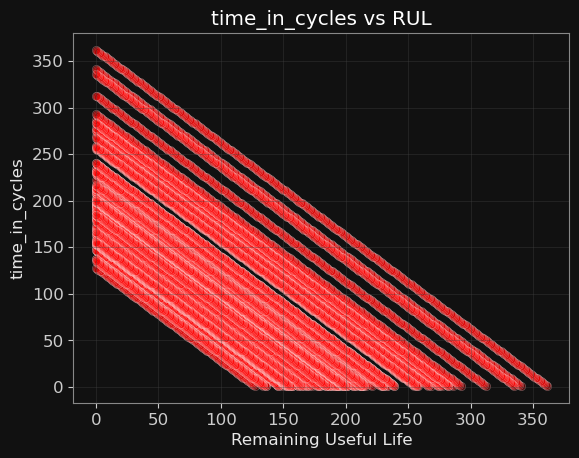

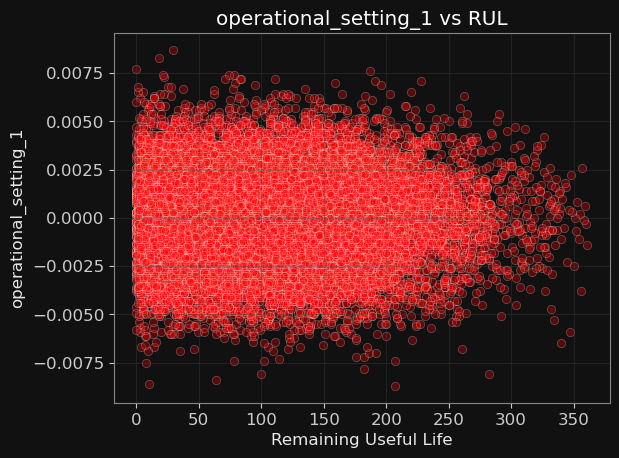

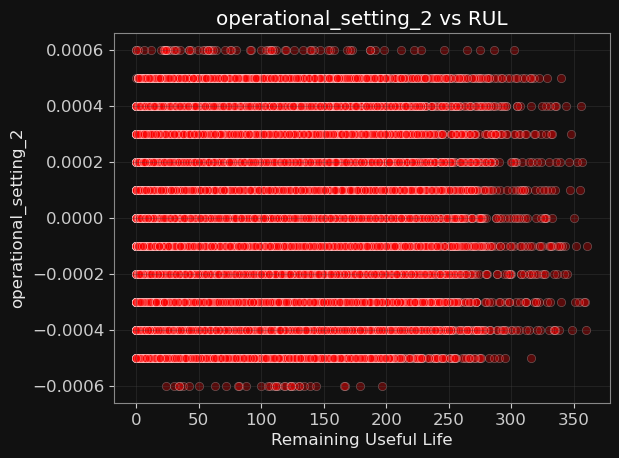

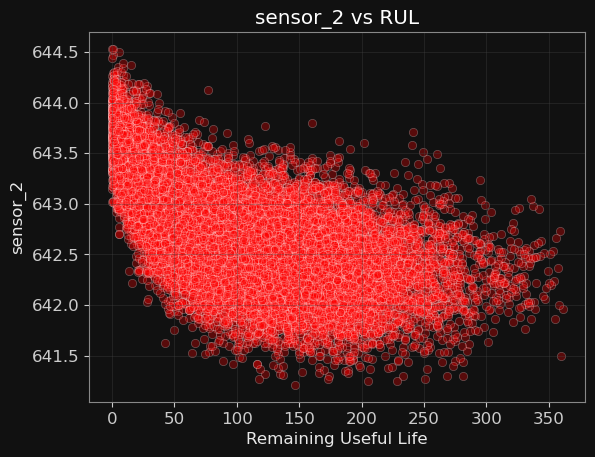

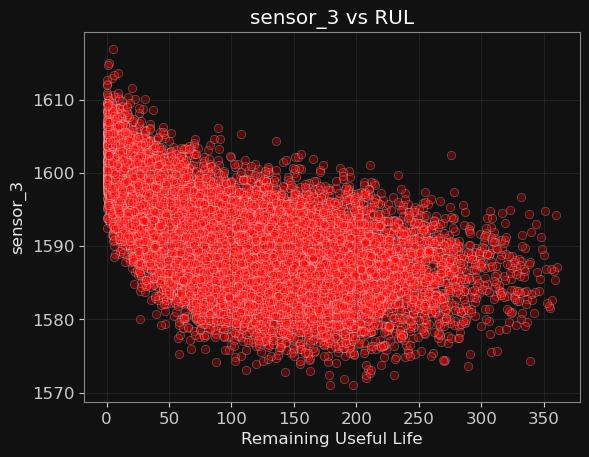

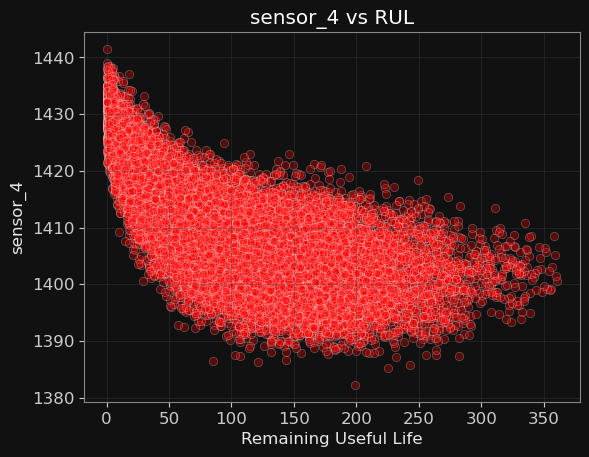

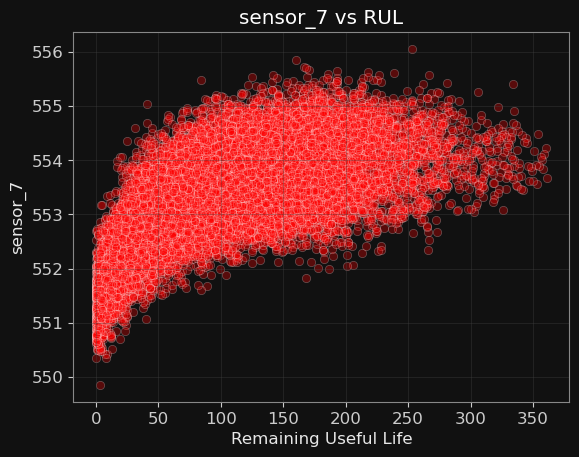

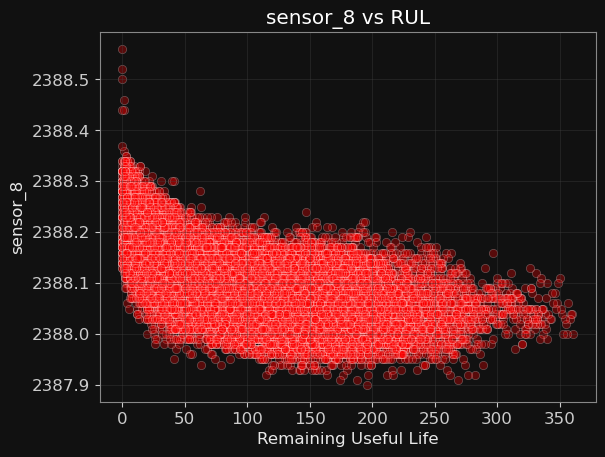

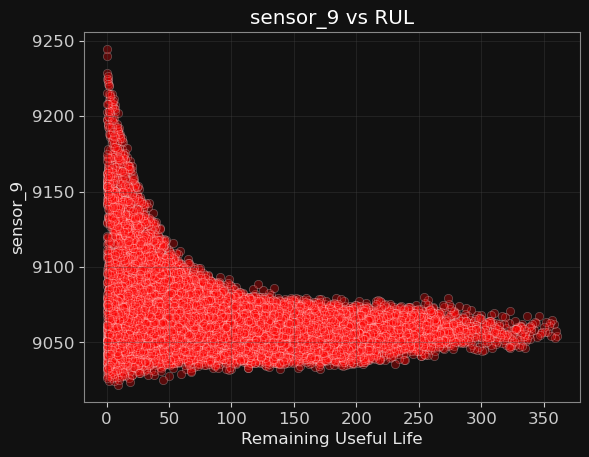

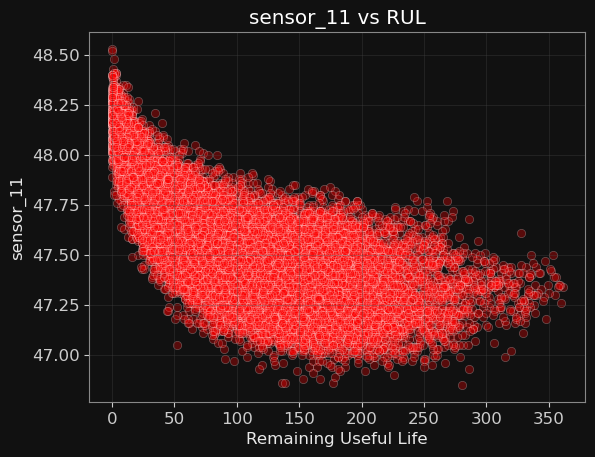

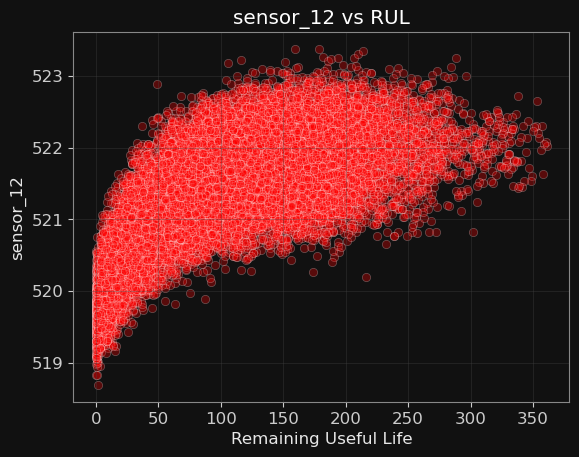

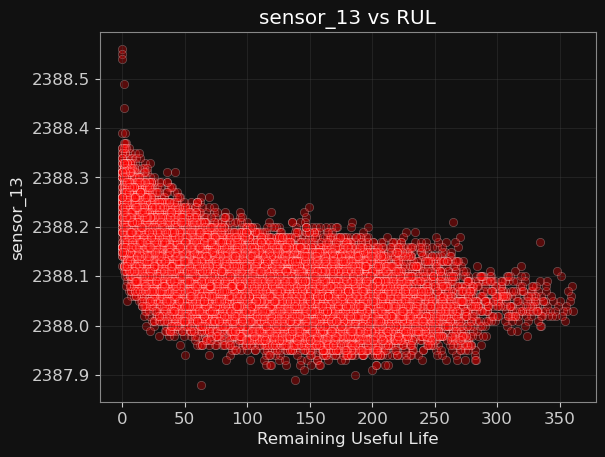

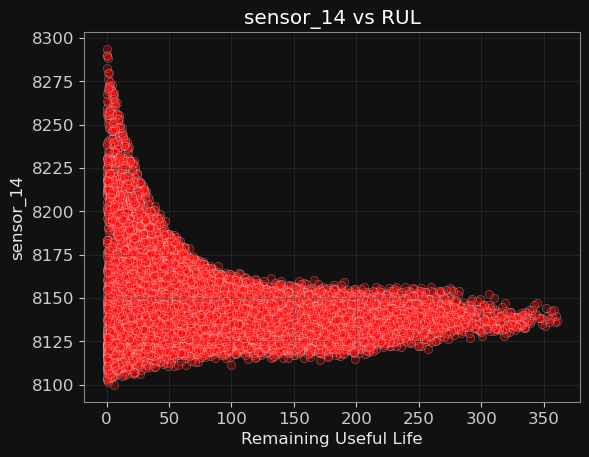

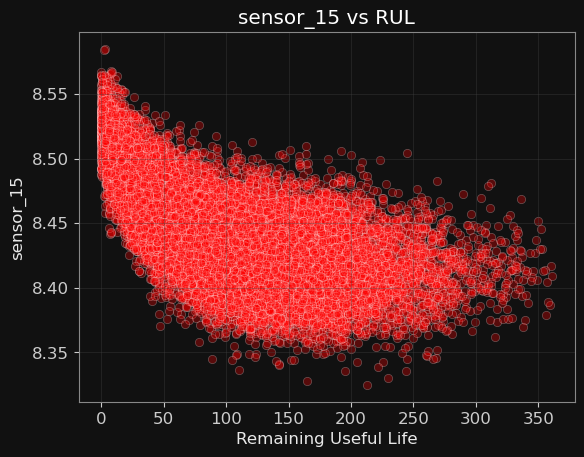

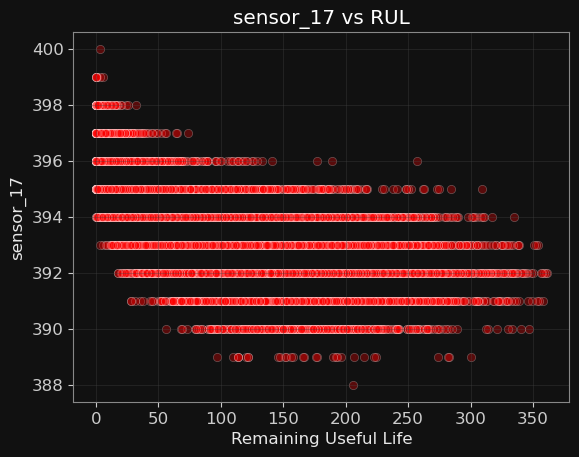

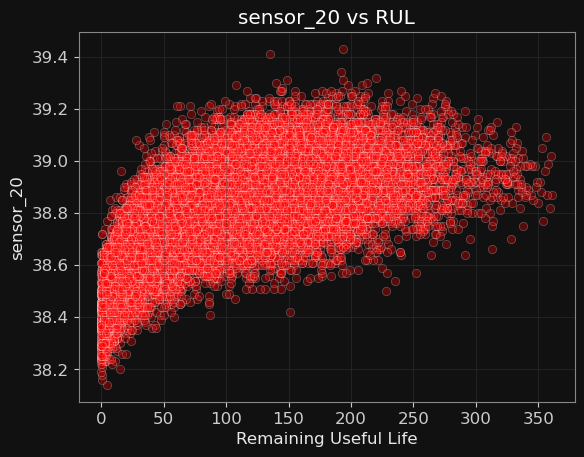

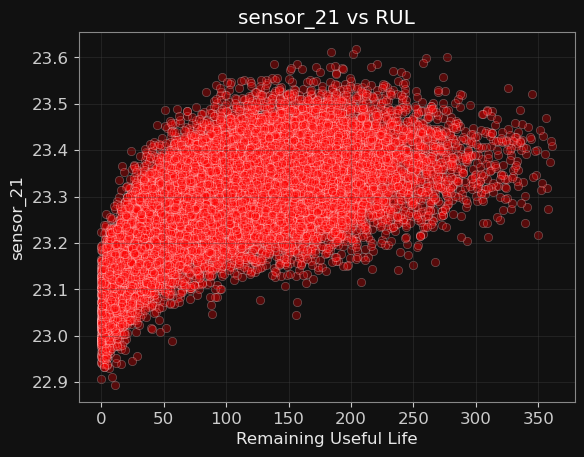

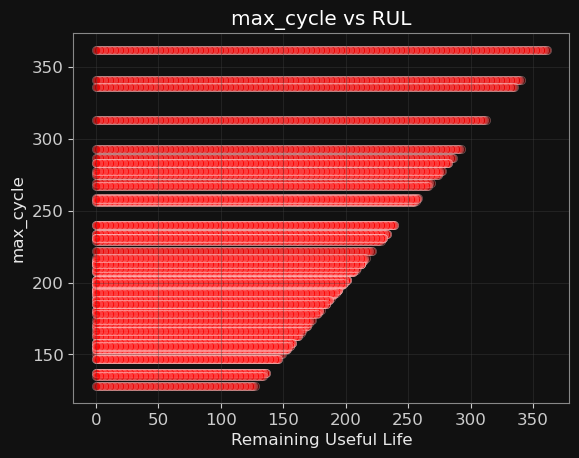

In [83]:
# Plot features against target variable (Scatterplot)
for col in df.columns:
    if col not in ["RUL", "unit_number"]:
        sns.scatterplot(data=df, x="RUL", y=col, alpha=0.3, color='red')
        plt.title(f"{col} vs RUL")
        plt.xlabel("Remaining Useful Life")
        plt.ylabel(col)
        plt.show()